<a href="https://colab.research.google.com/github/Rodfc773/DataScience/blob/main/Projeto_LACCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas que serao utilizadas nessa primeira etapa de tratamento de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



## Importando a base de dados que sera utilizada

In [2]:
US_Accidents_df = pd.read_csv('/content/drive/MyDrive/DataSets/US_Accidents_Dec21_updated.csv')

US_Accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Verificando o tamanho do DataFrame

In [3]:
#Printando o numero de linhas e colunas do data frame
print(US_Accidents_df.shape)

(2845342, 47)


### Vemos que o DataFrame possui 47 colunas, que sao:

In [4]:
#Printando quais colunas o dataset possui
US_Accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Faremos uma verificação pra ver se o dataset possui valores nulos ou NAN

In [5]:
US_Accidents_df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

### Vemos que o dataset possui dados faltando nas colunas:


*   Number : O numero da rua que aconteceu o acidente
*   Wind_speed
*   wind_direction
 

### Observamos que a maior parte dos dados faltando são de de colunas que não fazem ou tem pouca importância para a ánlise do dataset, logo vamos filtrar o dataset



In [6]:
Acidentes_filtrados_df = US_Accidents_df.loc[:,'ID' : 'State']

print(Acidentes_filtrados_df.shape)
Acidentes_filtrados_df


(2845342, 16)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA


## Reduzimos o dataset para as colunas de maior importância para a analise, porém ainda precisamos tratar os dados nulos ou NANs

ID                    0
Severity              0
Start_Time            0
End_Time              0
Start_Lat             0
Start_Lng             0
End_Lat               0
End_Lng               0
Distance(mi)          0
Description           0
Number          1743911
Street                2
Side                  0
City                137
County                0
State                 0
dtype: int64
Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State'],
      dtype='object')
ID              0
Severity        0
Start_Time      0
End_Time        0
Start_Lat       0
Start_Lng       0
End_Lat         0
End_Lng         0
Distance(mi)    0
Description     0
Street          0
Side            0
City            0
County          0
State           0
dtype: int64


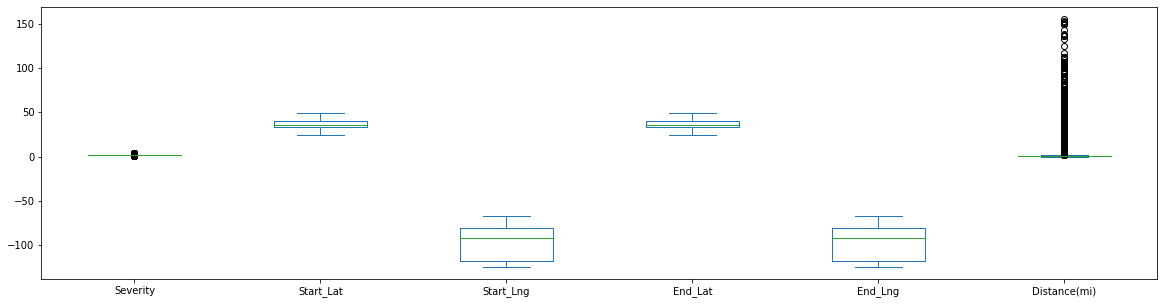

In [7]:
print(Acidentes_filtrados_df.isna().sum())
#Como a maior parte dos dados NAN estao concentrados na coluna Number
#Como essa coluna representa o numero da rua que ocorreu o acidente, e temos coluna com o nome e esatdo da rua, iremos dropar essa coluna, ja que ela nao influenciara
#Na analise

Acidentes_filtrados_df = Acidentes_filtrados_df.drop('Number', axis = 1)

print(Acidentes_filtrados_df.columns)

#Agora Iremos nos livrar das linhas que contem valo na coluna city como Nan

Acidentes_filtrados_df = Acidentes_filtrados_df.dropna()

print(Acidentes_filtrados_df.isna().sum())

Acidentes_filtrados_df.plot(kind = 'box', figsize = (20,5))

plt.show()

## A problematica a ser trabalhada vai ser:

*   Determinar qual a severidade de um acidente de acordo com o comprimento que foi afetado na estrada

*   Listar qual foi o maior estado que houve acidentes



## Para isso sera nescessario adicionar uma nova coluna no nosso DataFrame filtrado chamada Distance(km) que sera o trecho afetado na estrado em kilometros , ou seja converter a distancia que esta em milhas para km

In [8]:
# transformando milhas para km

Acidentes_filtrados_df['Distance(Km)'] = Acidentes_filtrados_df.loc[:,'Distance(mi)'].apply(lambda x : x * 1.60934)

Acidentes_filtrados_df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Distance(Km)
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,5.198168
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,1.202177
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,0.088514
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,0.197949
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,0.804670


In [9]:
# Transformando Start_time e Star_end em objetos datetime

from datetime import datetime

Acidentes_filtrados_df['End_Time'] = pd.to_datetime(Acidentes_filtrados_df['End_Time'])
Acidentes_filtrados_df['Start_Time'] = pd.to_datetime(Acidentes_filtrados_df['Start_Time'])
Acidentes_filtrados_df['Tempo_congestionado'] = Acidentes_filtrados_df['End_Time'] - Acidentes_filtrados_df['Start_Time']

Acidentes_filtrados_df['Tempo_congestionado'] = Acidentes_filtrados_df.loc[:,'Tempo_congestionado'].apply(lambda x : float(x.total_seconds() / 3600))
                                                                                                          
#Calculando a velocidade media a rodovia interditada
Acidentes_filtrados_df['Velocidade_Media'] = Acidentes_filtrados_df['Distance(Km)'] / Acidentes_filtrados_df['Tempo_congestionado']
Acidentes_filtrados_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Distance(Km),Tempo_congestionado,Velocidade_Media
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,5.198168,6.0,0.866361
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,1.202177,6.0,0.200363
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,0.088514,6.0,0.014752
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,0.197949,6.0,0.032991
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,0.804670,6.0,0.134112


## Verificando a quantidade acidentes por severidade




2    2532878
3     155101
4     131174
1      26050
Name: Severity, dtype: int64


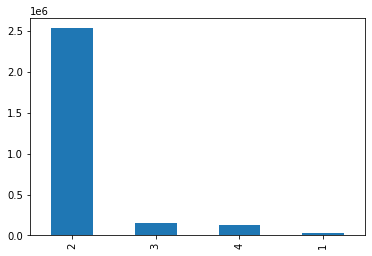

In [10]:

total_acidentes = Acidentes_filtrados_df['Severity'].value_counts()

print(total_acidentes)

total_acidentes.plot(kind = 'bar', rot = 90)

plt.show()



### Vemos que tiveram mais acidentes de grau 2 do que os outros tipos, logo veremos qual  e o estado com mais acidentes de grau 2

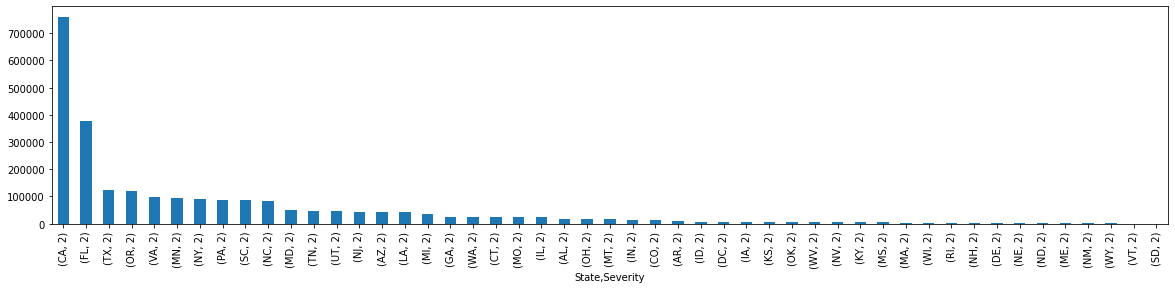

In [11]:

Acidentes_grauDois = Acidentes_filtrados_df[Acidentes_filtrados_df['Severity'] == 2]
Acidentes_por_estado = Acidentes_grauDois.groupby('State')['Severity'].value_counts().sort_values(ascending = False)


Acidentes_por_estado.plot(kind = 'bar', figsize = (20,4))

plt.show()


### *Observamos que o maior estado com acidentes de grau 2 foi a California*

## Aplicando modelos de ML

                     Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  \
Severity             1.000000   0.089205   0.114061  0.089207  0.114062   
Start_Lat            0.089205   1.000000  -0.154994  0.999995 -0.154991   
Start_Lng            0.114061  -0.154994   1.000000 -0.154985  0.999999   
End_Lat              0.089207   0.999995  -0.154985  1.000000 -0.154982   
End_Lng              0.114062  -0.154991   0.999999 -0.154982  1.000000   
Distance(mi)         0.092140   0.071581   0.039848  0.071586  0.039818   
Distance(Km)         0.092140   0.071581   0.039848  0.071586  0.039818   
Tempo_congestionado  0.012456  -0.006397   0.003446 -0.006406  0.003451   
Velocidade_Media     0.081092   0.038058   0.044318  0.038049  0.044294   

                     Distance(mi)  Distance(Km)  Tempo_congestionado  \
Severity                 0.092140      0.092140             0.012456   
Start_Lat                0.071581      0.071581            -0.006397   
Start_Lng                0.039848

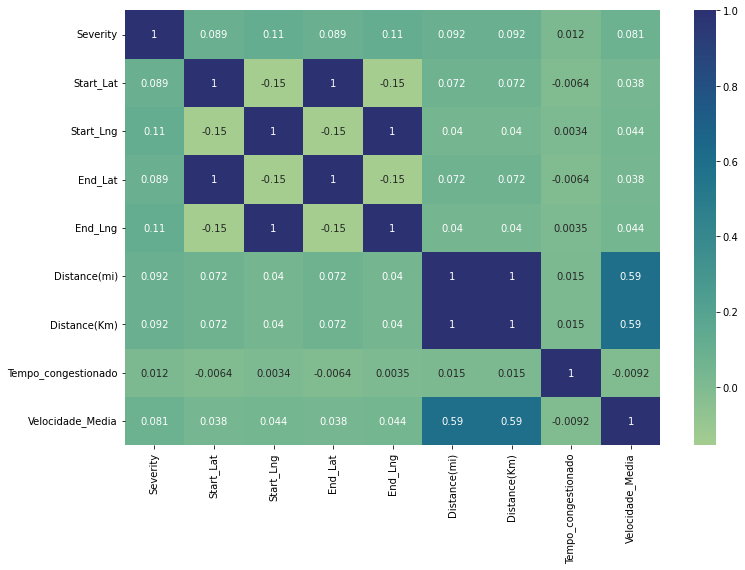

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, datasets, cluster, metrics


print(Acidentes_filtrados_df.corr())

plt.figure(figsize = (12,8))
sns.heatmap(data = Acidentes_filtrados_df.corr(), cmap = 'crest', annot = True)

plt.show()

## Utilizando uma behavior tree para o comportamento dos dados

In [13]:

Acidentes_semStrings = Acidentes_filtrados_df.drop(['Description', 'Side', 'Street','State', 'City', 'County', 'Start_Time', 'End_Time', 'ID'], axis = 1)
Acidentes_semStrings.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Distance(Km),Tempo_congestionado,Velocidade_Media
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,5.198168,6.0,0.866361
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,1.202177,6.0,0.200363
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,0.088514,6.0,0.014752
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,0.197949,6.0,0.032991
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,0.804670,6.0,0.134112


In [14]:
target = Acidentes_semStrings.pop('Severity')

In [15]:
x_train, x_test, y_train, y_test = train_test_split(Acidentes_semStrings, target, test_size = 0.2, random_state = 42)

dtr = tree.DecisionTreeClassifier()

dtr.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_predict = dtr.predict(x_test)

y_predict

array([2, 2, 2, ..., 2, 2, 3])

In [17]:
score = metrics.accuracy_score(y_test, y_predict)
score

0.8949952639616477

# _Utilizando o Random forest_

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
ry_pred = rf.predict(x_test)

ry_pred

array([2, 2, 2, ..., 2, 2, 2])

In [19]:
rfscore = rf.score(x_test, y_test)


rfscore

0.9128129607532673

# _Utilizando o knn para uma ultima conclusão_ 

In [20]:
#Acidentes_semStrings['target'] = y_predict
#sns.pairplot(data= Acidentes_semStrings, hue= 'target', palette= 'bright')

## Testes de modelos(Apenas exemplos)

In [21]:
import numpy as np

# Criando dados de exemplo
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, y.shape)
# Treinando o modelo com os dados de treinamento
dtr = tree.DecisionTreeRegressor()
dtr.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = dtr.predict(x_test)
print(y_pred)

(4, 2) (4,)
[10.]
